Machine learning could be seen as a tool that help us decode aparent noise into signals. For it to work we dont necesarly need to percive the signals since this patterns can be inperceptible for humans. Mainly because because the amount of data is to big for us to hold and process mentally at the same time or we cant actually see the signal, our perception is not fit for it. An example of this last case is tabular data, as people we are not really good at decoding signals from this data structure. While machine learning systems thrive in this type of problems.

I want to represent this in an artistic way where we see only random at first, generated by a random computer function and we see it transform noise into an organize structure.

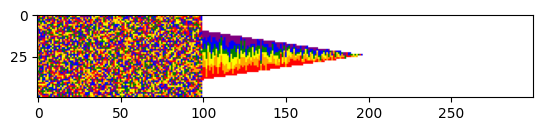

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(42)

columns = 300
rows = 50

# Create an initial random array with values from 1 to 6.
# (Values 1-6 will later be mapped to colors; here 0 will represent white.)
random_array = np.random.randint(1, 7, size=(rows, columns))

# Define phase boundaries.
phase1_end = columns // 3           # First third: leave unchanged.
phase2_end = 2 * columns // 3       # Middle third: partially sorted.
# Last third (from phase2_end to columns) will be phase 3.

for i in range(columns):
    if i < phase1_end:
        # Phase 1: Do nothing, keep the column as originally generated.
        continue

    elif i < phase2_end:
        # Phase 2: Partially sort the column.
        # Re-normalize the threshold so that it increases from 0.4 to 1 across Phase 2.
        normalized = (i - phase1_end) / (phase2_end - phase1_end)
        threshold = 1-(0.4 + normalized * (1 - 0.4))  # Goes from 0.4 at the start to 1 at the end.
        
        num_sorted = int(rows * threshold)
        # Center the sorted block vertically.
        offset = (rows - num_sorted) // 2

    if num_sorted > 0:
        # Extract the block to sort, sort it in descending order,
        # and then place it back in the centered block.
        sorted_values = np.sort(random_array[offset:offset + num_sorted, i])[::-1]
        random_array[offset:offset + num_sorted, i] = sorted_values

    # Fill the unsorted parts with white (0).
    random_array[:offset, i] = 0
    random_array[offset + num_sorted:, i] = 0


# We map 0 to white and then values 1 to 6 to red, orange, yellow, green, blue, purple.
cmap = LinearSegmentedColormap.from_list(
    "custom", ["white", "red", "orange", "yellow", "green", "blue", "purple"]
)

# Display the image.
# Setting vmin=0 and vmax=6 ensures that 0 (white) and 1-6 (colors) are correctly mapped.
plt.imshow(random_array, cmap=cmap, vmin=0, vmax=6)
plt.show()

